In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("Dataquest/train_titanic.csv")
print("Number of samples in train dataset is: {}".format(train_df.shape))
train_df.head()

Number of samples in train dataset is: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("Dataquest/test_titanic.csv")
print("Number of samples in test dataset is: {}".format(test_df.shape))
test_df.head()

Number of samples in test dataset is: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
## Check for null values in train and test data set
print("Train dataset \n{}\n".format(train_df.isnull().sum()))
print("Test dataset \n{}".format(test_df.isnull().sum()))

Train dataset 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test dataset 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
Titanic_full_dataset = pd.concat([test_df, train_df], axis = 0)
print(Titanic_full_dataset.shape)
print(Titanic_full_dataset.head())

(1309, 12)
    Age Cabin Embarked     Fare                                          Name  \
0  34.5   NaN        Q   7.8292                              Kelly, Mr. James   
1  47.0   NaN        S   7.0000              Wilkes, Mrs. James (Ellen Needs)   
2  62.0   NaN        Q   9.6875                     Myles, Mr. Thomas Francis   
3  27.0   NaN        S   8.6625                              Wirz, Mr. Albert   
4  22.0   NaN        S  12.2875  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

   Parch  PassengerId  Pclass     Sex  SibSp  Survived   Ticket  
0      0          892       3    male      0       NaN   330911  
1      0          893       3  female      1       NaN   363272  
2      0          894       2    male      0       NaN   240276  
3      0          895       3    male      0       NaN   315154  
4      1          896       3  female      1       NaN  3101298  


c:\users\navendu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


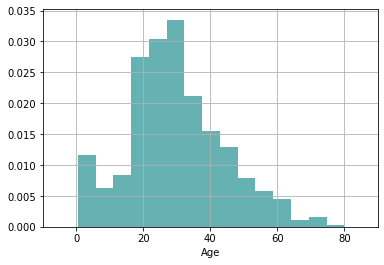

In [7]:
age_hist = train_df["Age"].hist(bins =15, density=True, stacked = True , color = "teal", alpha = 0.6)
# train_df["Age"].plot(kind='density', color='teal')
age_hist.set(xlabel = "Age")
plt.xlim(-10 , 90)
plt.show()

In [8]:
print("the mean of 'Age' is {:0.2f}".format(train_df["Age"].mean(skipna = True)))
print("the median of 'Age' is {:0.2f}".format(train_df["Age"].median(skipna = True)))

the mean of 'Age' is 29.70
the median of 'Age' is 28.00


In [9]:
print("Total missing values in Cabin is {}".format(train_df["Cabin"].isnull().sum()))
## Total missing values in Cabin is way to much lets Check the percentage.
print("Percentage of missing values in Cabin is {}".format(train_df["Cabin"].isnull().sum()/train_df.shape[0]*100))

Total missing values in Cabin is 687
Percentage of missing values in Cabin is 77.10437710437711


Total missing values in Embarked is 2
Percentage of missing values in Embarked is 0.22446689113355783
S    644
C    168
Q     77
Name: Embarked, dtype: int64


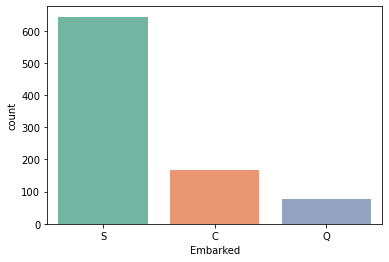

In [10]:
print("Total missing values in Embarked is {}".format(train_df["Embarked"].isnull().sum()))
## Total missing values in Embarked is less lets Check the percentage.
print("Percentage of missing values in Embarked is {}".format(train_df["Embarked"].isnull().sum()/train_df.shape[0]*100))
print(train_df["Embarked"].value_counts())
sns.countplot(x="Embarked", data=train_df,palette ="Set2")
plt.show()

In [11]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna = True), inplace = True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(), inplace = True)
train_data.drop("Cabin", axis = 1, inplace = True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
training = pd.get_dummies( train_data, columns=["Embarked","Pclass","Sex"])
training.drop("Sex_female",axis =1, inplace = True)
training.drop("PassengerId",axis =1, inplace = True)
training.drop("Name",axis =1, inplace = True)
training.drop("Ticket",axis =1, inplace = True)
train_data_final= training
train_data_final.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [14]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna =True), inplace = True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna = True), inplace = True)
test_data.drop("Cabin", axis = 1, inplace = True)


testing = pd.get_dummies( train_data, columns=["Embarked","Pclass","Sex"])
testing.drop("Sex_female",axis =1, inplace = True)
testing.drop("PassengerId",axis =1, inplace = True)
testing.drop("Name",axis =1, inplace = True)
testing.drop("Ticket",axis =1, inplace = True)
test_data_final= testing
test_data_final.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

col  = ["Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_male"]

X = train_data_final.loc[:, train_data_final.columns != "Survived"]
# X = train_data_final[col]
Y = train_data_final["Survived"]
# print(X.head())
# print(Y.head())

In [17]:
Model = LogisticRegression()

rfe = RFE(Model, 10)
rfe = rfe.fit(X, Y)

print("Selected Features %s" % list(X.columns[ rfe.support_ ]))

c:\users\navendu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
c:\users\navendu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Selected Features ['Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']


c:\users\navendu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<function matplotlib.pyplot.show(*args, **kw)>

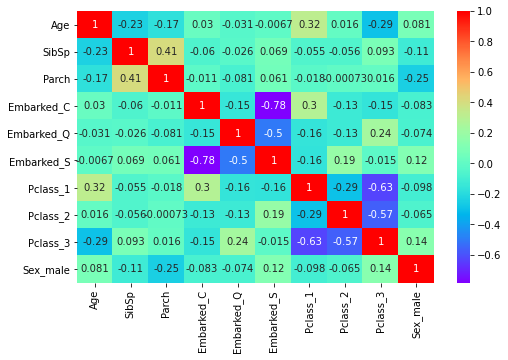

In [18]:
Selected_Features = ['Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male']
X = train_data_final[Selected_Features]
plt.subplots(figsize=(8,5 ))
sns.heatmap(X.corr(), annot = True , cmap = "rainbow")
plt.show

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = train_data_final[Selected_Features]
y = train_data_final["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state = 2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print("Train/Test split results:")
print(logreg.__class__.__name__+" accuracy is {:0.2f}".format(accuracy_score(y_test, y_pred)))
print(logreg.__class__.__name__+" log_loss is {:0.2f}".format(log_loss(y_test, y_pred_proba)))
print(logreg.__class__.__name__+" auc is {:0.2f}".format(auc(fpr, tpr)))

Train/Test split results:
LogisticRegression accuracy is 0.79
LogisticRegression log_loss is 0.51
LogisticRegression auc is 0.83


In [26]:
from sklearn import tree
from sklearn.metrics import accuracy_score

decision_tree = tree.DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = round(decision_tree.score(X_train,y_train)*100, 2)
accuracy

92.56

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

random_forest = RandomForestRegressor(n_estimators = 500)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = round(random_forest.score(X_train,y_train)*100, 2)
accuracy 

78.54